In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


GCaMP time points: 159632
GCaMP dF/F points: 159632


C:\Users\urimons.WISMAIN\AppData\Local\Temp\ipykernel_20692\3687793536.py:43: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start, end, color='m', alpha=0.5, edgecolor= 'none', lw=0, label='Grooming Bout' if start == starting_times[0] else "")


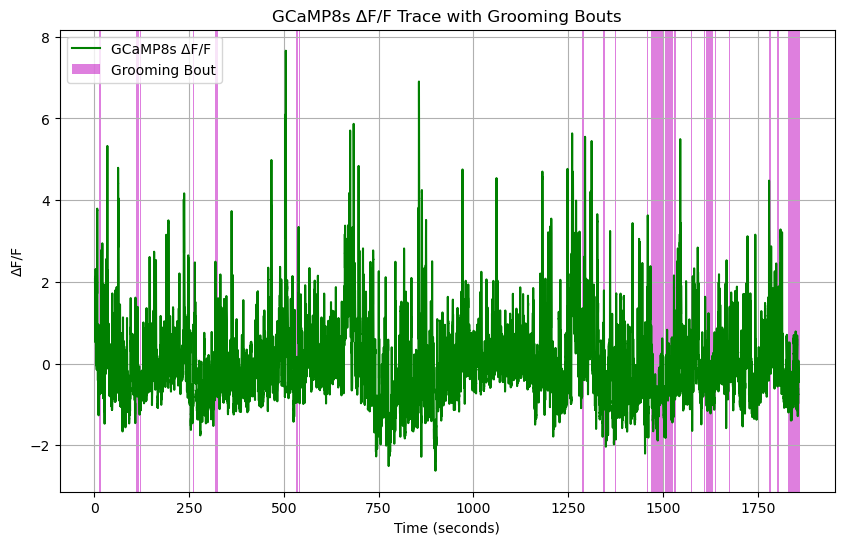

In [58]:
# Frame to time conversion functions
def frame2time(X):
    return 0.03342285848 * X - 0.9540002344

def frame2time2(X, first_choosen_led_frame, second_choosen_led_frame):
    return frame2time(first_choosen_led_frame) + (X - first_choosen_led_frame) * (
        frame2time(second_choosen_led_frame) - frame2time(first_choosen_led_frame)
    ) / (second_choosen_led_frame - first_choosen_led_frame)

# Insert frames with LED light on
first_choosen_led_frame = 8853
second_choosen_led_frame = 30619

# Load GCaMP data (assumed to be a dictionary stored in a .npy file)
gcamp_file_path = r"Z:\UriMons\Fiber Photometry\mCyRFP_CGaMP8m\Analysis\M202_res.npy"
gcamp_data = np.load(gcamp_file_path, allow_pickle=True).item()

# Extract time and GCaMP ΔF/F values from the dictionary
time_in_seconds_gcamp = gcamp_data['time']  # Replace 'key1' if different
gcamp_dF_F = gcamp_data['GCaMP_dF_F']  # Replace 'key2' if different
print("GCaMP time points:", len(time_in_seconds_gcamp))
print("GCaMP dF/F points:", len(gcamp_dF_F))

# Load the grooming bouts CSV file (30 fps data)
grooming_bout_csv = r"Z:\UriMons\Fiber Photometry\mCyRFP_CGaMP8m\Behavioral annotation\FP-CeA_EPA\CSVs\M202_EPA_Grooming.csv"
grooming_data = pd.read_csv(grooming_bout_csv)

# Extract 'Starting frame' and 'Ending frame'
starting_frames = grooming_data['Starting frame']
ending_frames = grooming_data['Ending frame']
grooming_fps = 30  # Grooming bout frame rate

# Convert grooming frames to time (in seconds) using frame2time2
starting_times = [frame2time2(frame, first_choosen_led_frame, second_choosen_led_frame) for frame in starting_frames]
ending_times = [frame2time2(frame, first_choosen_led_frame, second_choosen_led_frame) for frame in ending_frames]

# Plot the GCaMP trace
plt.figure(figsize=(10, 6))
plt.plot(time_in_seconds_gcamp, gcamp_dF_F, color='g', label='GCaMP8s ΔF/F')

# Shade the grooming bouts
for start, end in zip(starting_times, ending_times):
    plt.axvspan(start, end, color='m', alpha=0.5, edgecolor= 'none', lw=0, label='Grooming Bout' if start == starting_times[0] else "")

# Customize the plot
plt.title('GCaMP8s ΔF/F Trace with Grooming Bouts')
plt.xlabel('Time (seconds)')
plt.ylabel('ΔF/F')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

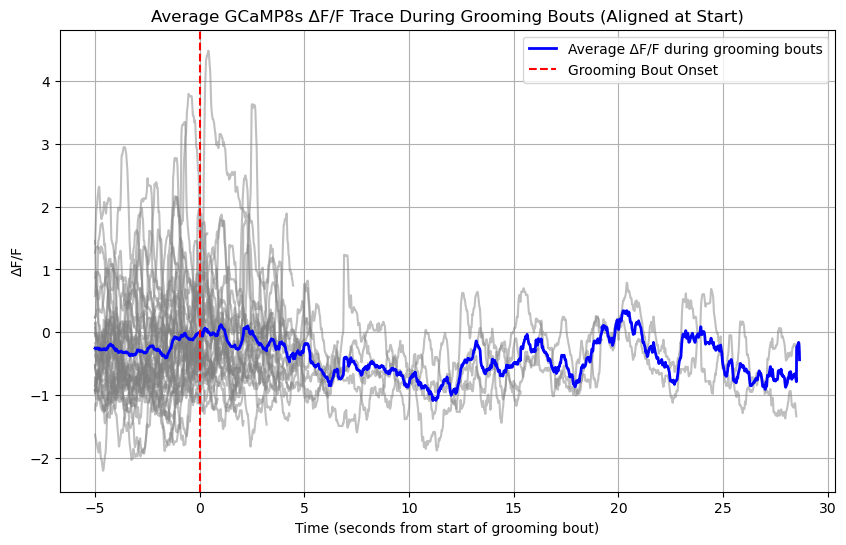

In [59]:
# Create a list to store all aligned grooming bout ΔF/F traces
grooming_bout_traces = []

# Define the time to include before each grooming bout (5 seconds)
pre_bout_time = 5  # seconds

# Loop through each grooming bout and extract the corresponding GCaMP ΔF/F values
for start_time, end_time in zip(starting_times, ending_times):
    # Adjust the start time to include 5 seconds before the grooming bout
    pre_bout_start_time = start_time - pre_bout_time
    
    # Find indices of GCaMP data that correspond to the time range (5 seconds before to end of grooming bout)
    bout_indices = (time_in_seconds_gcamp >= pre_bout_start_time) & (time_in_seconds_gcamp <= end_time)
    
    # Extract the ΔF/F values during this adjusted time range
    gcamp_bout_values = gcamp_dF_F[bout_indices]
    
    # Append the extracted values to the list of grooming bout traces
    grooming_bout_traces.append(gcamp_bout_values)

# Align all traces to start from the same point
# Find the maximum length of any grooming bout to align them properly
max_length = max(len(trace) for trace in grooming_bout_traces)

# Align all traces by padding with NaN to match the max_length
aligned_traces = [np.pad(trace, (0, max_length - len(trace)), 'constant', constant_values=np.nan) for trace in grooming_bout_traces]

# Convert the list of aligned traces to a numpy array
aligned_traces = np.array(aligned_traces)

# Calculate the average ΔF/F trace across all grooming bouts (ignoring NaNs)
average_grooming_trace = np.nanmean(aligned_traces, axis=0)

# GCaMP frame rate (in frames per second)
gcamp_fps = 86  # Update this value if needed

# Time axis (aligned to start 5 seconds before the grooming bouts) in seconds
time_in_seconds_aligned = (np.arange(max_length) - (pre_bout_time * gcamp_fps)) / gcamp_fps

# Plot the individual grooming bout ΔF/F traces with time in seconds
plt.figure(figsize=(10, 6))
for trace in aligned_traces:
    plt.plot(time_in_seconds_aligned, trace, color='gray', alpha=0.5)

# Plot the average ΔF/F trace on top with time in seconds
plt.plot(time_in_seconds_aligned, average_grooming_trace, color='b', label='Average ΔF/F during grooming bouts', linewidth=2)

# Add a vertical line (marker) at the grooming bout onset (time = 0)
plt.axvline(0, color='red', linestyle='--', label='Grooming Bout Onset')

# Customize the plot
plt.title('Average GCaMP8s ΔF/F Trace During Grooming Bouts (Aligned at Start)')
plt.xlabel('Time (seconds from start of grooming bout)')
plt.ylabel('ΔF/F')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


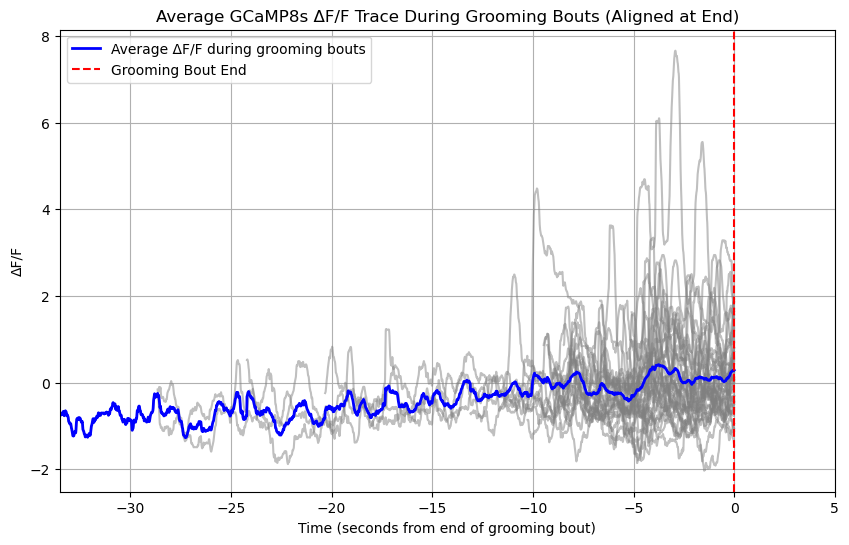

In [65]:
# Create a list to store all aligned grooming bout ΔF/F traces
grooming_bout_traces = []



# # Loop through each grooming bout and extract the corresponding GCaMP ΔF/F values
# for start_time, end_time in zip(starting_times, ending_times):
   
#     # Find indices of GCaMP data that correspond to the time range (during grooming bout)
#     bout_indices = (time_in_seconds_gcamp >= start_time) & (time_in_seconds_gcamp <= end_time)
    
#     # Extract the ΔF/F values during this adjusted time range
#     gcamp_bout_values = gcamp_dF_F[bout_indices]
    
#     # Append the extracted values to the list of grooming bout traces
#     grooming_bout_traces.append(gcamp_bout_values)


# Define the time to include before each grooming bout (5 seconds)
post_bout_time = 5  # seconds

# Loop through each grooming bout and extract the corresponding GCaMP ΔF/F values
for start_time, end_time in zip(starting_times, ending_times):
    # Adjust the start time to include 5 seconds before the grooming bout
    post_bout_end_time = end_time + post_bout_time
    
    # Find indices of GCaMP data that correspond to the time range (5 seconds before to end of grooming bout)
    bout_indices = (time_in_seconds_gcamp >= start_time) & (time_in_seconds_gcamp <= post_bout_end_time)
    
    # Extract the ΔF/F values during this adjusted time range
    gcamp_bout_values = gcamp_dF_F[bout_indices]
    
    # Append the extracted values to the list of grooming bout traces
    grooming_bout_traces.append(gcamp_bout_values)




# Align all traces to end at time 0
# Find the maximum length of any grooming bout to align them properly
max_length = max(len(trace) for trace in grooming_bout_traces)

# Align all traces by padding with NaN at the start to match the max_length
aligned_traces = [np.pad(trace, (max_length - len(trace), 0), 'constant', constant_values=np.nan) for trace in grooming_bout_traces]

# Convert the list of aligned traces to a numpy array
aligned_traces = np.array(aligned_traces)

# Calculate the average ΔF/F trace across all grooming bouts (ignoring NaNs)
average_grooming_trace = np.nanmean(aligned_traces, axis=0)

# GCaMP frame rate (in frames per second)
gcamp_fps = 86  # Update this value if needed

# Time axis (aligned to end of grooming bouts) in seconds
time_in_seconds_aligned_end = (np.arange(max_length) - (max_length - 1)) / gcamp_fps

# Plot the individual grooming bout ΔF/F traces with time in seconds
plt.figure(figsize=(10, 6))
for trace in aligned_traces:
    plt.plot(time_in_seconds_aligned_end, trace, color='gray', alpha=0.5)

# Plot the average ΔF/F trace on top with time in seconds
plt.plot(time_in_seconds_aligned_end, average_grooming_trace, color='b', label='Average ΔF/F during grooming bouts', linewidth=2)

# Add a vertical line (marker) at the grooming bout end (time = 0)
plt.axvline(0, color='red', linestyle='--', label='Grooming Bout End')

# Customize the plot
plt.title('Average GCaMP8s ΔF/F Trace During Grooming Bouts (Aligned at End)')
plt.xlabel('Time (seconds from end of grooming bout)')
plt.ylabel('ΔF/F')
plt.xlim([-max_length / gcamp_fps, 5])  # Show from the max duration to 0s
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


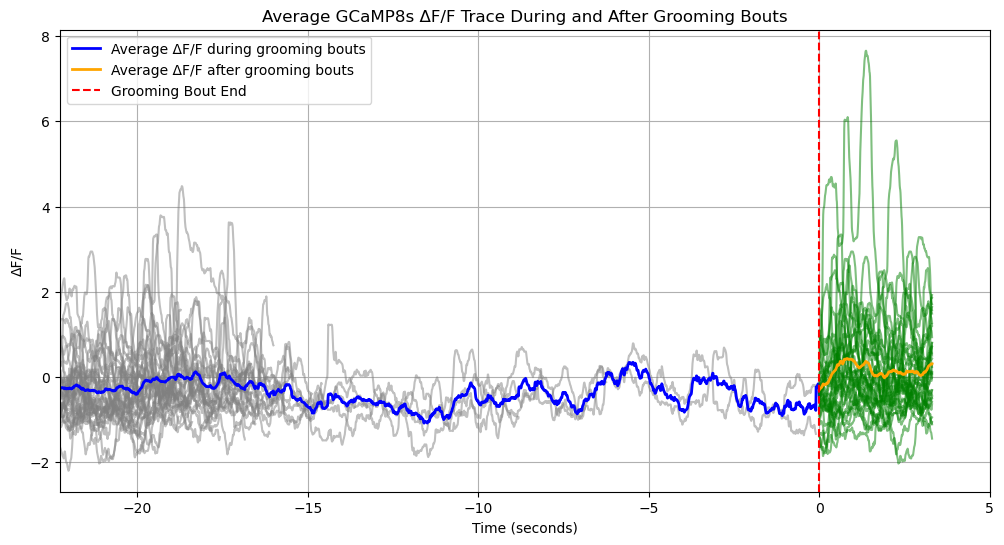

In [54]:
# Create a list to store all aligned grooming bout ΔF/F traces
grooming_bout_traces = []

# Create a list to store traces after grooming bouts
post_grooming_traces = []

# Define the time to include before and after each grooming bout (5 seconds)
pre_bout_time = 5  # seconds before the bout
post_bout_time = 5  # seconds after the bout

# Loop through each grooming bout and extract the corresponding GCaMP ΔF/F values
for start_time, end_time in zip(starting_times, ending_times):
    # Find indices of GCaMP data that correspond to the time range (5 seconds before to end of grooming bout)
    bout_indices = (time_in_seconds_gcamp >= start_time - pre_bout_time) & (time_in_seconds_gcamp <= end_time)
    
    # Extract the ΔF/F values during this adjusted time range for grooming bout
    gcamp_bout_values = gcamp_dF_F[bout_indices]
    
    # Append the extracted values to the list of grooming bout traces
    grooming_bout_traces.append(gcamp_bout_values)
    
    # Find indices for the post-bout range (5 seconds after grooming bout ends)
    post_bout_indices = (time_in_seconds_gcamp > end_time) & (time_in_seconds_gcamp <= end_time + post_bout_time)
    
    # Extract the ΔF/F values for the post-bout time range
    post_grooming_values = gcamp_dF_F[post_bout_indices]
    
    # Append the extracted values to the list of post-grooming traces
    post_grooming_traces.append(post_grooming_values)

# Align all grooming bout traces to end at the same point
# Find the maximum length of any grooming bout to align them properly
max_length = max(len(trace) for trace in grooming_bout_traces)

# Align all grooming bout traces by padding with NaN to match the max_length
aligned_traces = [np.pad(trace, (0, max_length - len(trace)), 'constant', constant_values=np.nan) for trace in grooming_bout_traces]

# Align all post grooming traces
max_post_length = max(len(trace) for trace in post_grooming_traces)
aligned_post_traces = [np.pad(trace, (0, max_post_length - len(trace)), 'constant', constant_values=np.nan) for trace in post_grooming_traces]

# Convert the list of aligned traces to a numpy array
aligned_traces = np.array(aligned_traces)
aligned_post_traces = np.array(aligned_post_traces)

# Calculate the average ΔF/F trace across all grooming bouts (ignoring NaNs)
average_grooming_trace = np.nanmean(aligned_traces, axis=0)

# Calculate the average ΔF/F trace across all post grooming bouts (ignoring NaNs)
average_post_trace = np.nanmean(aligned_post_traces, axis=0)

# GCaMP frame rate (in frames per second)
gcamp_fps = 130  # Updated frame rate

# Time axis for grooming bouts (aligned to end at 0)
time_in_seconds_aligned = np.linspace(-max_length / gcamp_fps, 0, max_length)

# Time axis for post grooming bouts (starting at 0)
time_in_seconds_post_aligned = np.linspace(0, max_post_length / gcamp_fps, max_post_length)

# Plot the individual grooming bout ΔF/F traces with time in seconds
plt.figure(figsize=(12, 6))

# Plot grooming bout traces
for trace in aligned_traces:
    plt.plot(time_in_seconds_aligned, trace, color='gray', alpha=0.5)

# Plot average grooming bout trace
plt.plot(time_in_seconds_aligned, average_grooming_trace, color='b', label='Average ΔF/F during grooming bouts', linewidth=2)

# Plot post-grooming traces
for post_trace in aligned_post_traces:
    plt.plot(time_in_seconds_post_aligned, post_trace, color='green', alpha=0.5)

# Plot average post-grooming trace
plt.plot(time_in_seconds_post_aligned, average_post_trace, color='orange', label='Average ΔF/F after grooming bouts', linewidth=2)

# Add a vertical line (marker) at the grooming bout end (time = 0)
plt.axvline(0, color='red', linestyle='--', label='Grooming Bout End')

# Customize the plot
plt.title('Average GCaMP8s ΔF/F Trace During and After Grooming Bouts')
plt.xlabel('Time (seconds)')
plt.ylabel('ΔF/F')
plt.xlim([-max_length / gcamp_fps, post_bout_time])  # Adjust x-axis limits
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
